In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp, ttest_ind, spearmanr

In [6]:
BindingDB = pd.read_csv('./data/PPAR alpha BingdingDB clean.csv')
BindingDB

,BindingDB Reactant_set_id,IC50 (nM),ChEMBL ID of Ligand,Smiles,pIC50
0,50341418,16.00,CHEMBL207103,CCCc1c(OCCCNc2ccc(CC(=O)O)cc2)ccc2c(C(F)(F)F)n...,7.795880
1,50449765,1610.00,CHEMBL474551,Cc1oc(-c2ccccc2)nc1CCOc1cccc(-c2nn(-c3ccccc3)n...,5.793174
2,50939102,384.00,CHEMBL237520,Cc1cc(Oc2ccc(F)c(CNC(=O)c3ccc(C(F)(F)F)cc3F)c2...,6.415669
3,50481553,850.00,CHEMBL3780894,CCCC(Sc1nc2cc(Cl)ccc2s1)C(=O)NS(=O)(=O)c1ccc([...,6.070581
4,50939151,3162.28,NaN,Cc1ccc(NC(=O)c2cccc(S(=O)(=O)n3ccc4cccc(Cl)c43...,5.500000
...,...,...,...,...,...
995,50320244,15000.00,CHEMBL381889,CC(C)(C)c1ccc(-n2c(C(=O)O)c(Oc3ccc(Cl)cc3)c3cc...,4.823909
996,50386691,5810.00,CHEMBL234170,Cc1cc2c(CC(=O)O)csc2cc1OCc1cc(-c2ccc(Cl)cc2)on1,5.235824
997,60750,529.00,NaN,Cc1oc(-c2ccccc2)nc1CCCc1ccc(CC(C(=O)O)c2cccc(-...,6.276544
998,50077377,10000.00,CHEMBL1760270,CCCCN(c1cccc(-c2ccc(Cl)cc2)c1C)S(=O)(=O)c1ccc(...,5.000000


In [7]:
CheMBL = pd.read_csv('./data/PPAR alpha CheMBL clean.csv')
CheMBL


,Molecule ChEMBL ID,Standard Relation,Canonical_Smiles,pIC50
0,CHEMBL1090189,'=',COc1ccc(-c2nc(COc3cccc(CN(CC(=O)O)C(=O)Oc4ccc(...,6.425969
1,CHEMBL234589,'=',O=C(O)Cc1csc2cc(OCc3ccc(COc4ccc(C(F)(F)F)cc4)c...,6.639994
2,CHEMBL117738,'=',CCCc1cc(C=C2CCCCC2)ccc1OCCCOc1cccc(C2SC(=O)NC2...,7.207608
3,CHEMBL4530053,'=',CCOc1ccc(-c2ccc(CCCc3nn(-c4ccc(C(F)(F)F)cc4)c(...,7.494850
4,CHEMBL2037078,'=',CCO[C@H](Cc1ccc2c(c1)cc(C)n2Cc1nc(-c2ccc(C(F)(...,6.453001
...,...,...,...,...
977,CHEMBL427520,'>',CCC(=O)c1ccc(OC(C(=O)O)c2ccccc2)cc1,4.301030
978,CHEMBL1760413,'=',CCCCN(c1cc(-c2ccc(Cl)cc2)cc(C(F)(F)F)c1)S(=O)(...,4.900000
979,CHEMBL404451,'>',Cc1oc(-c2ccccc2)nc1CCOc1ccc(C[C@H]2C(=O)N(c3cc...,4.823909
980,CHEMBL234169,'=',Cc1nc(-c2ccc(C(F)(F)F)cc2)sc1COc1cc(Cl)c2c(CC(...,5.982967


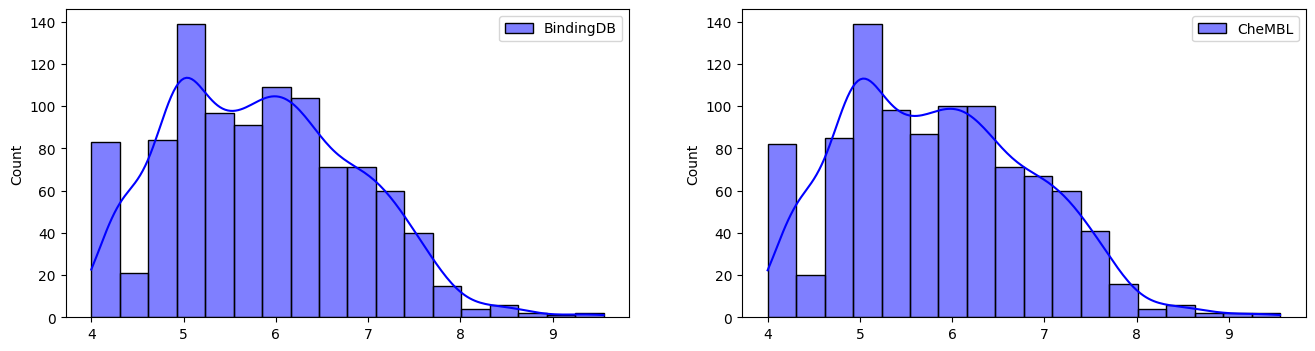

In [63]:
BindingDB_data = BindingDB['pIC50'].to_numpy()
CheMBL_data = CheMBL['pIC50'].to_numpy()

fig = plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
sns.histplot(BindingDB_data, kde=True, color='blue', label = 'BindingDB')   # kde: kernal density estimator
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(CheMBL_data, kde=True, color='blue', label = 'CheMBL')   # kde: kernal density estimator
plt.legend()
plt.show()

In [64]:
ks_stat, ks_pval = ks_2samp(BindingDB_data, CheMBL_data)
print(f'KS Statistic: {ks_stat:.4f}, p-value: {ks_pval:.4e}')

KS Statistic: 0.0099, p-value: 1.0000e+00


In [65]:
# T-test
t_stat, t_pval = ttest_ind(BindingDB_data, CheMBL_data, equal_var=False)
print(f'T-test Statistic: {t_stat:.4f}, p-value: {t_pval:.4e}')

T-test Statistic: -0.0546, p-value: 9.5647e-01
